In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

In [61]:
amba = pd.read_csv('./data/AMBA.csv')

In [62]:
print(amba.shape)

(2853, 7)


In [63]:
amba.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-11,6.06,6.44,6.00,6.08,6.08,416700
1,2012-10-12,6.05,6.30,6.01,6.23,6.23,155200
2,2012-10-15,6.35,6.40,6.05,6.15,6.15,156700
3,2012-10-16,6.15,6.30,5.94,6.01,6.01,173000
4,2012-10-17,6.00,6.08,5.99,6.00,6.00,113600


The min open/close price of AMBA is 6.00000
The max open/close price of AMBA is 216.660004 and 216.839996 respectively

In [64]:
amba.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2.853000e+03
mean,59.399888,60.739012,58.063505,59.403645,59.403645,1.004999e+06
std,33.523402,34.412228,32.559028,33.471636,33.471636,1.204699e+06
min,6.000000,6.080000,5.550000,6.000000,6.000000,1.890000e+04
25%,40.040001,40.990002,39.150002,40.090000,40.090000,4.201000e+05
50%,53.720001,54.740002,52.680000,53.680000,53.680000,6.554000e+05
75%,70.199997,72.059998,68.570000,70.190002,70.190002,1.116200e+06
max,216.660004,227.589996,209.050003,216.839996,216.839996,2.507260e+07


Understand the basic overview information about our dataframe

In [65]:
amba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2853 non-null   object 
 1   Open       2853 non-null   float64
 2   High       2853 non-null   float64
 3   Low        2853 non-null   float64
 4   Close      2853 non-null   float64
 5   Adj Close  2853 non-null   float64
 6   Volume     2853 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 156.2+ KB


Confirm null-values

In [66]:
amba.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Understand the data types that we are working with in our data

In [67]:
amba.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Exploratory Analysis

Determine Mid price pricing trend

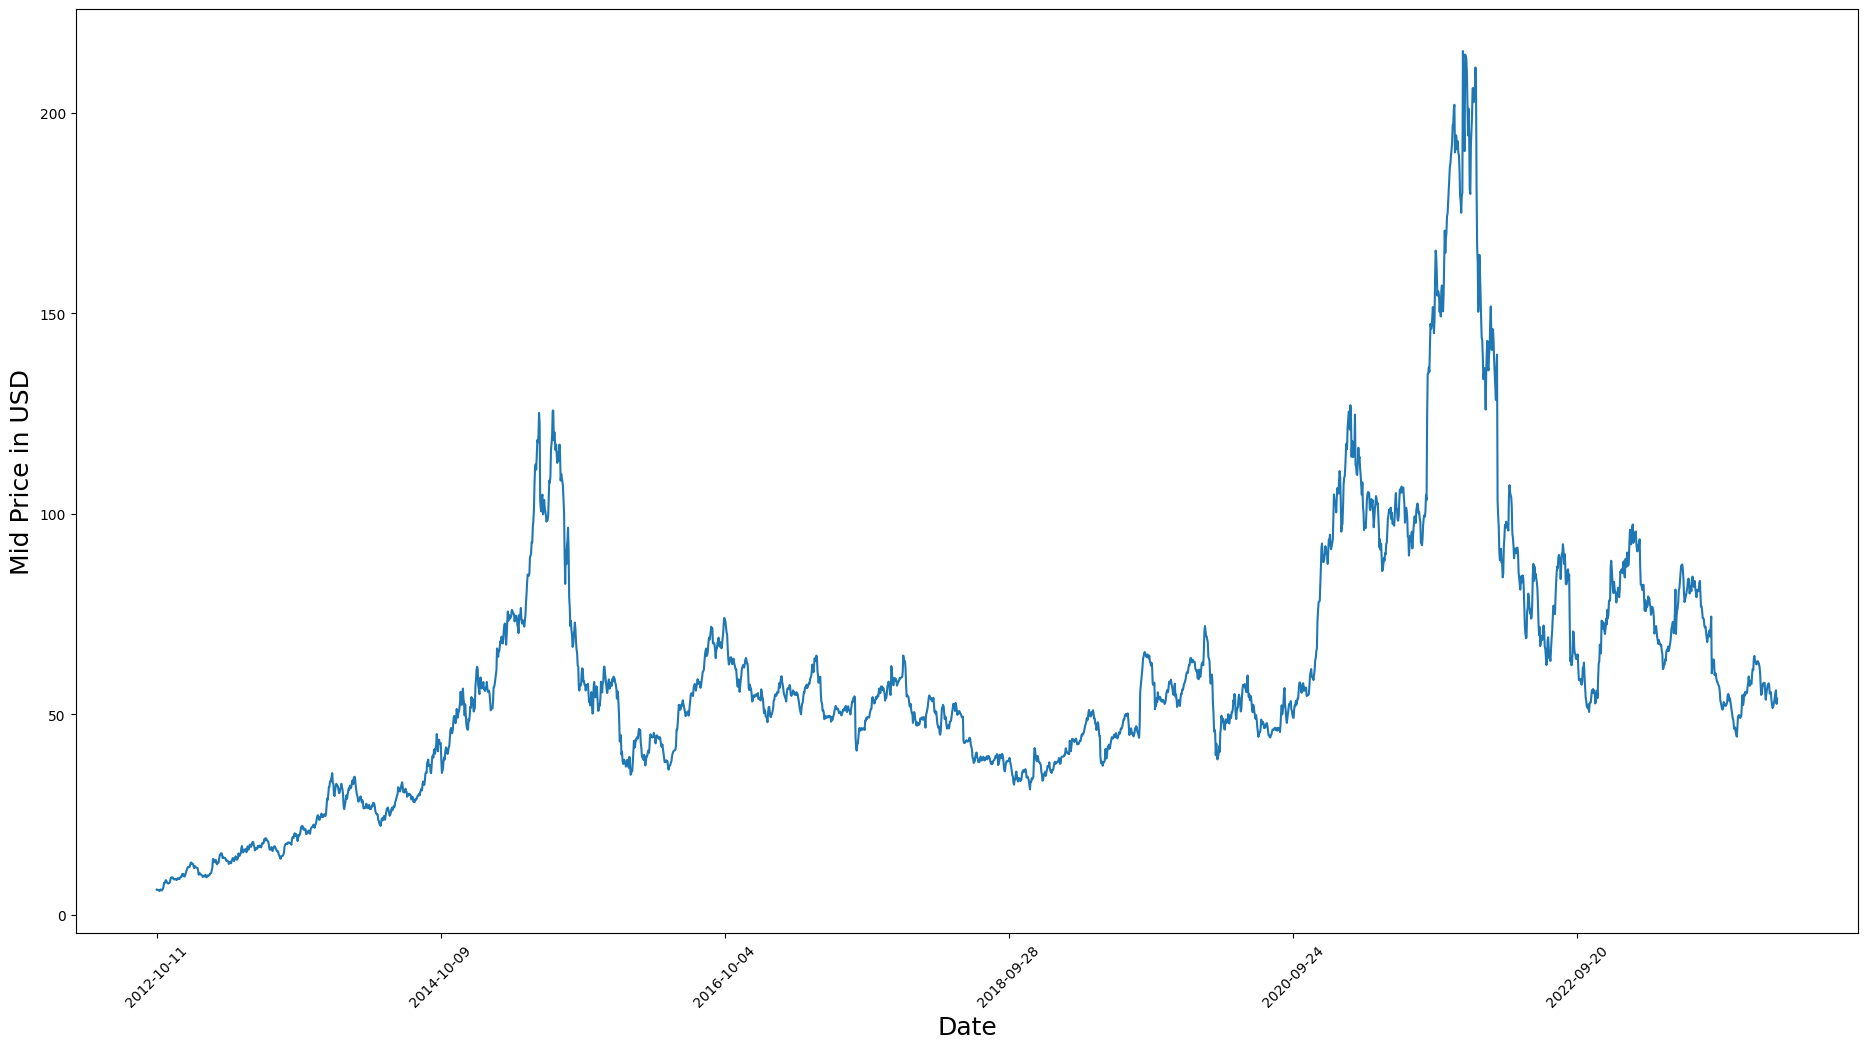

In [68]:
plt.figure(figsize=(23, 12))
plt.plot(range(amba.shape[0]), (amba['Low'] + amba['High']) / 2.0)
plt.xticks(range(0, amba.shape[0], 500), amba['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price in USD', fontsize=18)
plt.show()


Determine close price trends

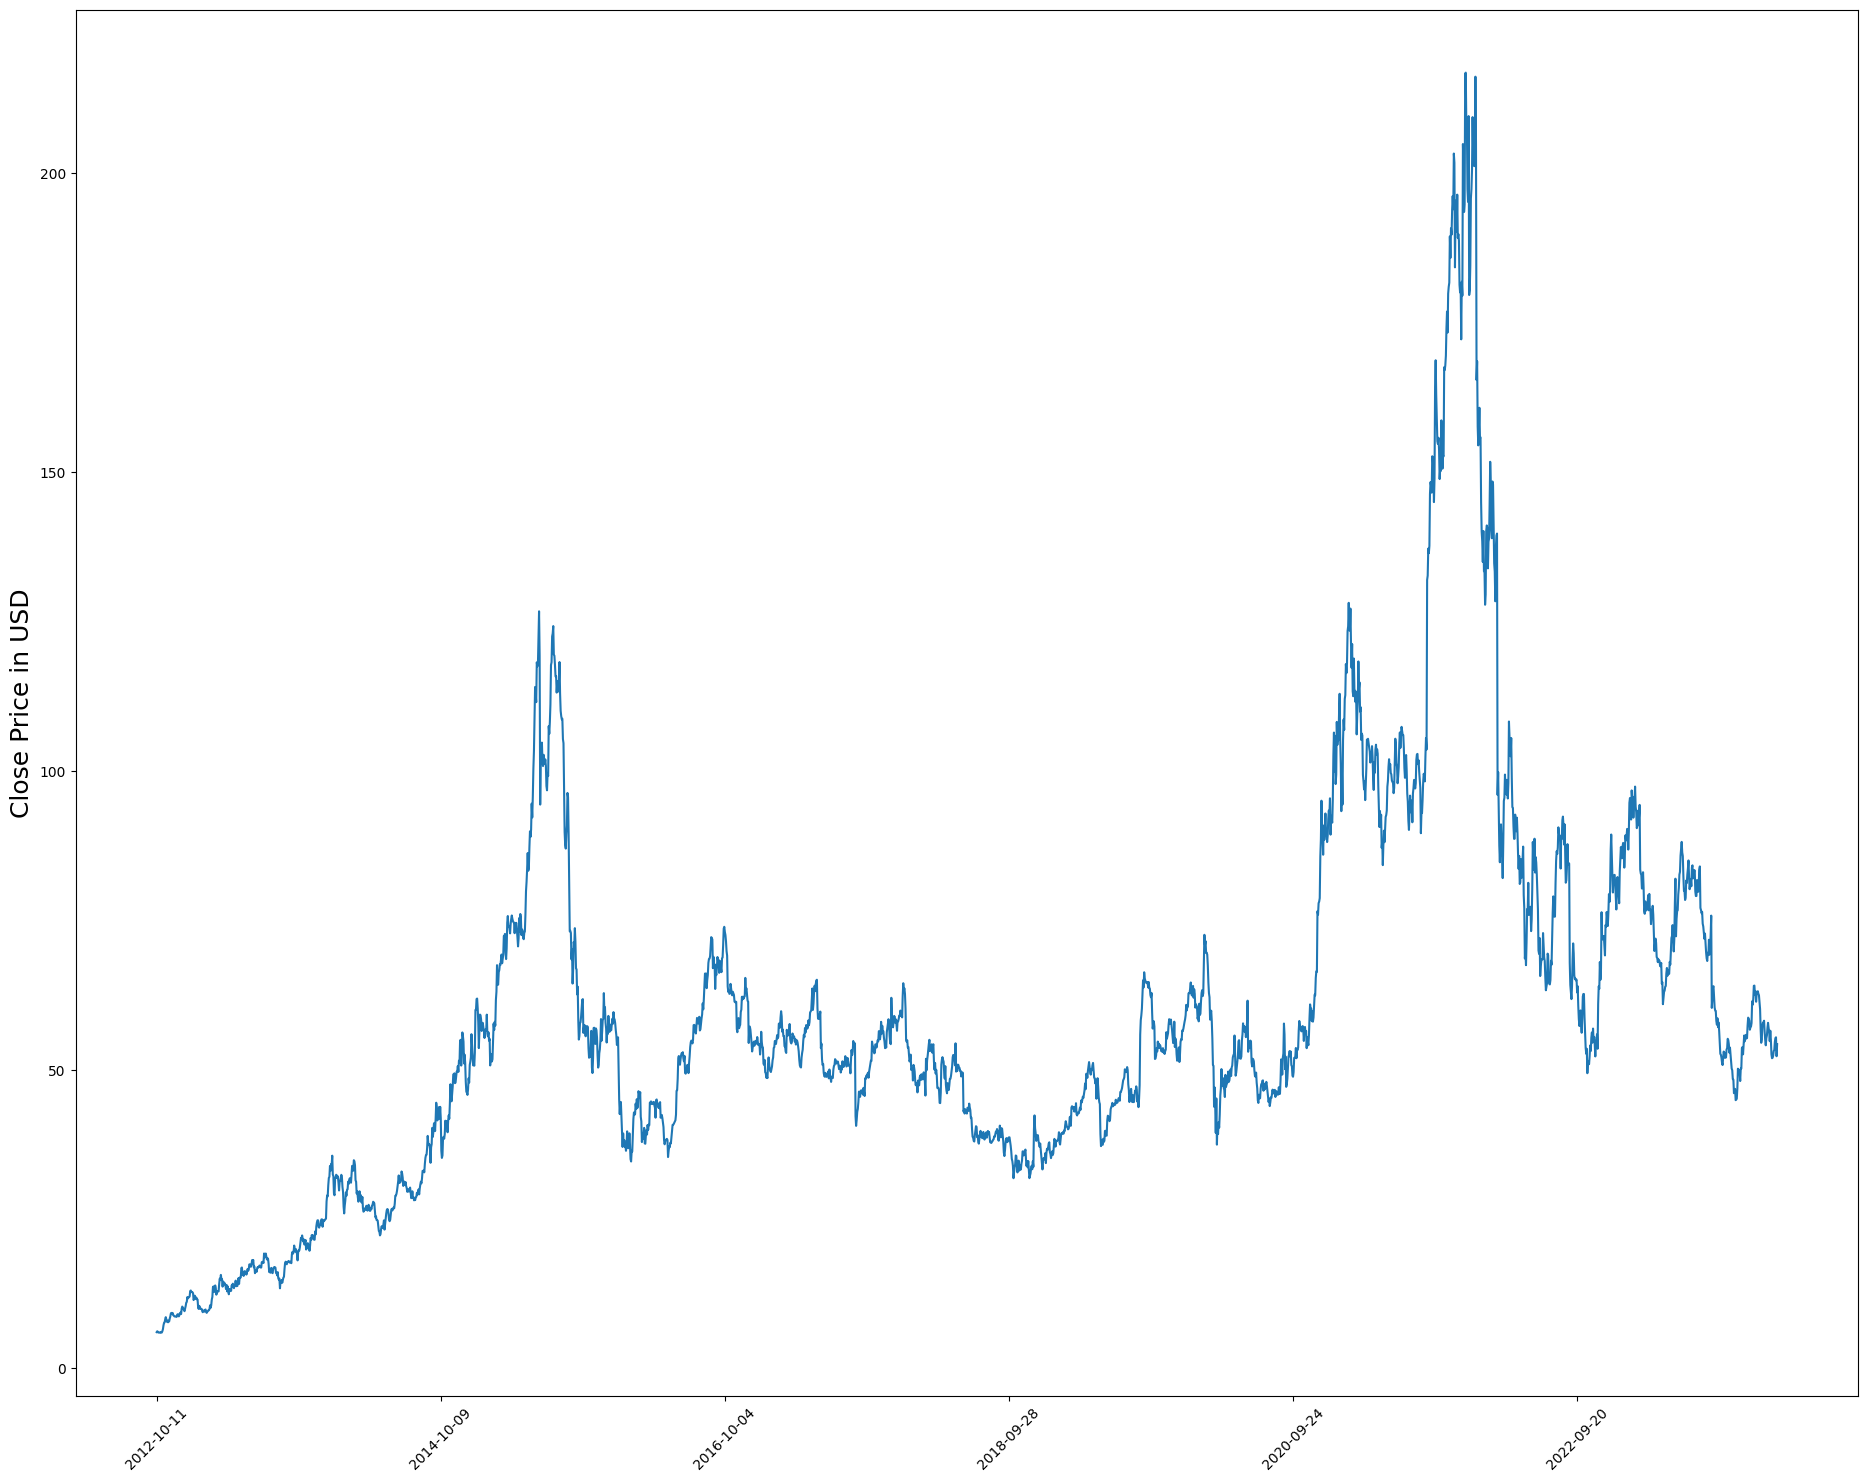

In [69]:
plt.figure(figsize=(23, 18))
plt.plot(amba['Close'])
plt.xticks(range(0, amba.shape[0], 500), amba['Date'].loc[::500], rotation=45)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()

Analyze and view featured pricing trends based on: Open price, High price, Low price, Close Price, Volume using histograms 

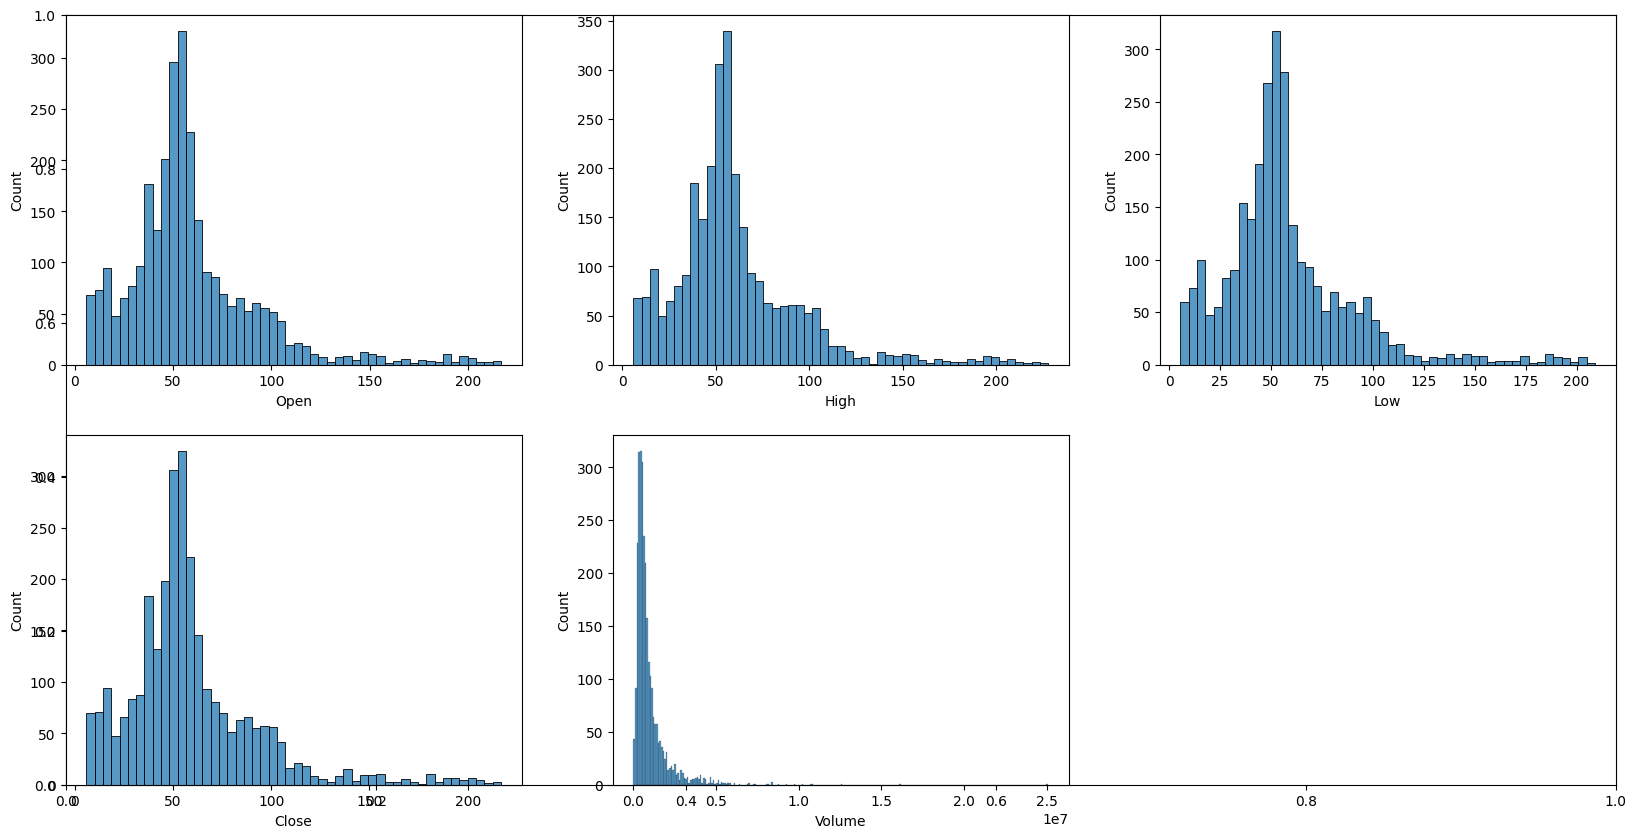

In [70]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.histplot(amba[col])
plt.show()


/var/folders/gf/xvv1f7qj6_n58v0ybnnd_mtc0000gp/T/ipykernel_36665/1275964749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(amba[col])
/var/folders/gf/xvv1f7qj6_n58v0ybnnd_mtc0000gp/T/ipykernel_36665/1275964749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(amba[col])
/var/folders/gf/xvv1

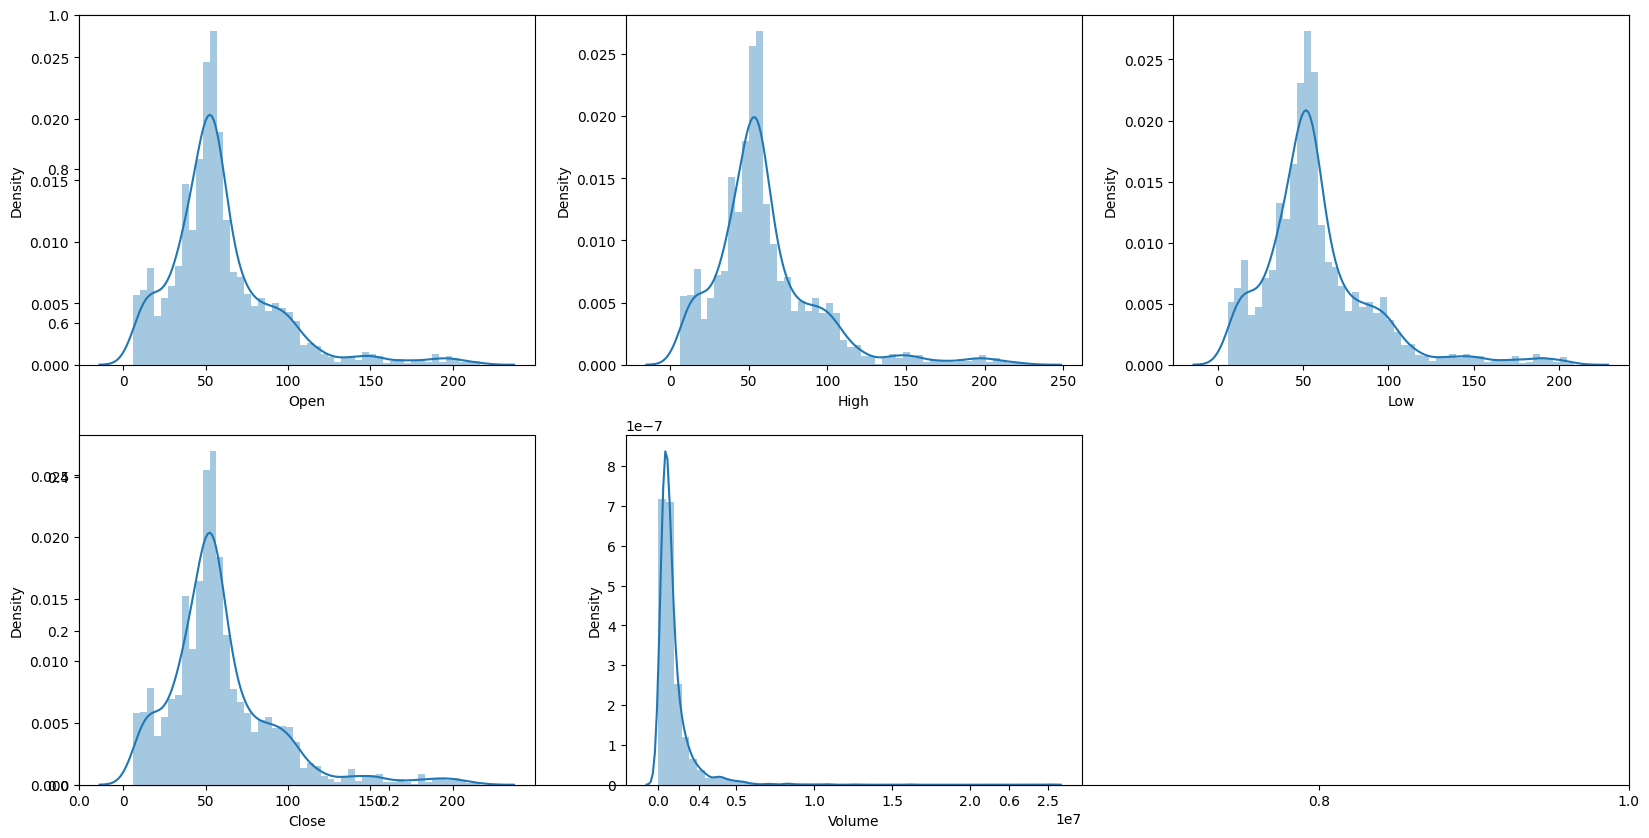

In [71]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(amba[col])
plt.show()


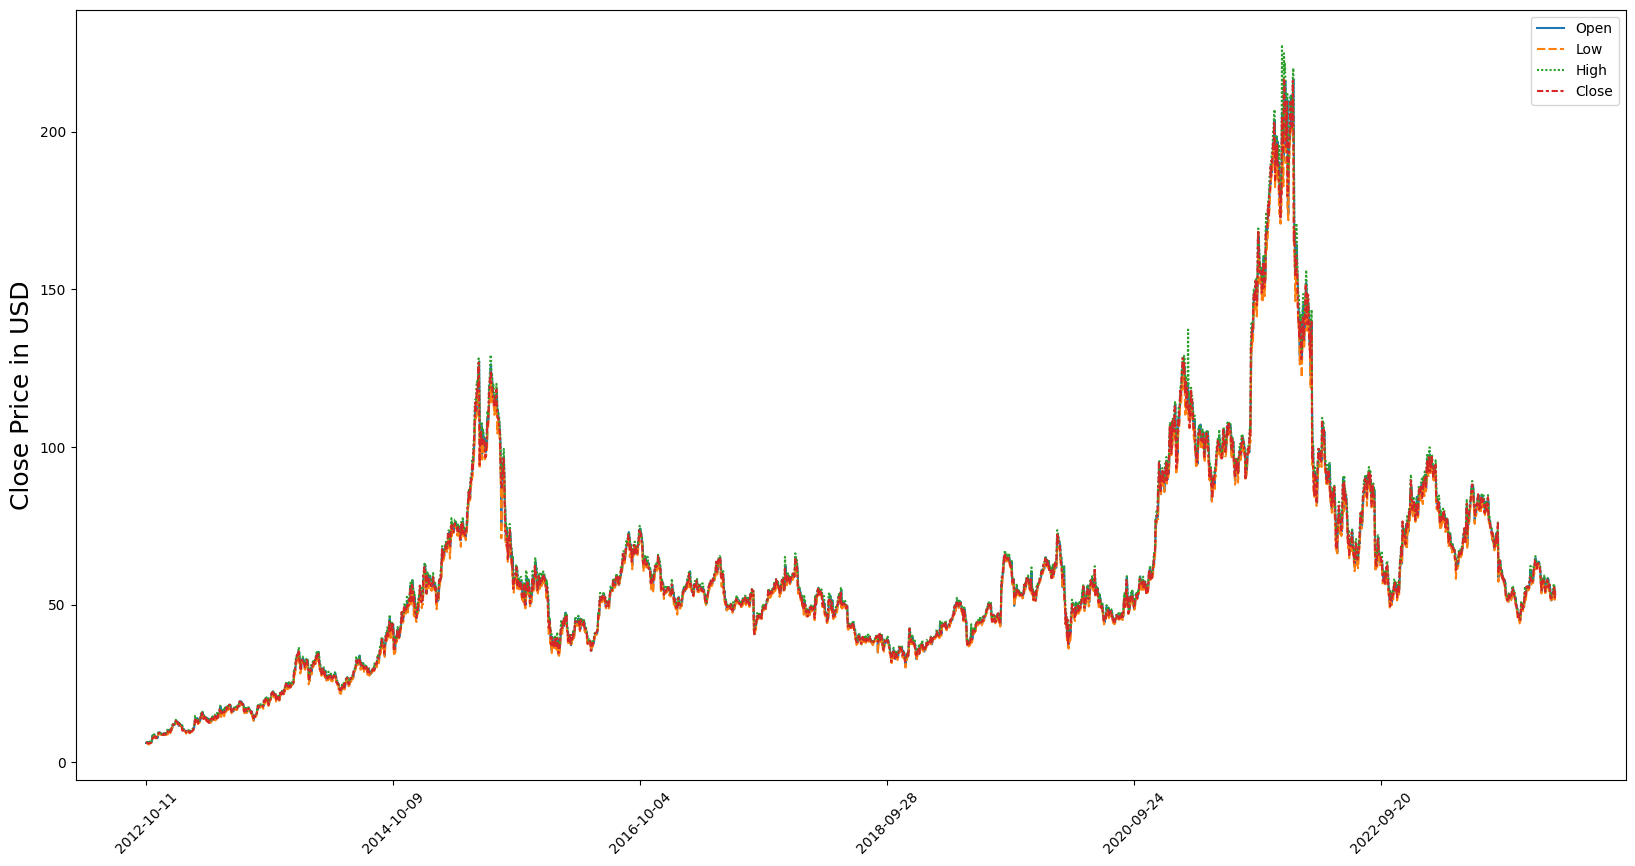

In [72]:
# Plot Multi lines
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.xticks(range(0, amba.shape[0], 500), amba['Date'].loc[::500], rotation=45)
plt.ylabel('Close Price in USD', fontsize=18)
ax = sb.lineplot(data=amba[['Open', 'Low', 'High', 'Close']])

Because Date is an object, we want to split the Date into new columns: Year, Month, and Day and store the values as an integer type

In [73]:
# Split the 'Date' column and handle errors
try:
    splitted = amba['Date'].str.split('-', expand=True)
except Exception as e:
    print("Error occurred during splitting:")
    print(e)

# If splitting was successful, proceed with data processing
if 'splitted' in locals():
    try:
        amba['Year'] = splitted[0].astype('int')
        amba['Month'] = splitted[1].astype('int')
        amba['Day'] = splitted[2].astype('int')
    except Exception as e:
        print("Error occurred during data processing:")
        print(e)

# Display the DataFrame head
print(amba.head())


         Date  Open  High   Low  Close  Adj Close  Volume  Year  Month  Day
0  2012-10-11  6.06  6.44  6.00   6.08       6.08  416700  2012     10   11
1  2012-10-12  6.05  6.30  6.01   6.23       6.23  155200  2012     10   12
2  2012-10-15  6.35  6.40  6.05   6.15       6.15  156700  2012     10   15
3  2012-10-16  6.15  6.30  5.94   6.01       6.01  173000  2012     10   16
4  2012-10-17  6.00  6.08  5.99   6.00       6.00  113600  2012     10   17


We want to see if quarter end has an influence on stock pricing. We will divide the Month value by 3 to determine if it is a quarter end month and store into a column called 'is_quarter_end'. If it is, we assign a value of 1. If not, we assign a quarter end value of 0.

In [74]:
amba['is_quarter_end'] = np.where(amba['Month']%3==0, 1, 0)
amba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
0,2012-10-11,6.06,6.44,6.00,6.08,6.08,416700,2012,10,11,0
1,2012-10-12,6.05,6.30,6.01,6.23,6.23,155200,2012,10,12,0
2,2012-10-15,6.35,6.40,6.05,6.15,6.15,156700,2012,10,15,0
3,2012-10-16,6.15,6.30,5.94,6.01,6.01,173000,2012,10,16,0
4,2012-10-17,6.00,6.08,5.99,6.00,6.00,113600,2012,10,17,0


Observe pricing and volume trends based on quarter end.
Note that the stock prices are higher on quarter ending but volume is lower.

In [75]:
amba.filter(items=['is_quarter_end', 'Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year']).groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,58.507171,59.767135,57.228686,58.512992,8.431833e+05,15.720294,6.098318,2017.973712
1,61.185321,62.682765,59.733144,61.184953,1.328630e+06,15.754995,7.533123,2017.895899


View pricing trends based on the average yearly price. The average yearly trend pricing is divided into four featured histogram charts: Open price, High price, Low price, Close price. 


Note that between years 2014 and 2015 AND years 2020 and 2021, the stock price doubled. Also note that there has been a steady decline in price from 2022 and onward.

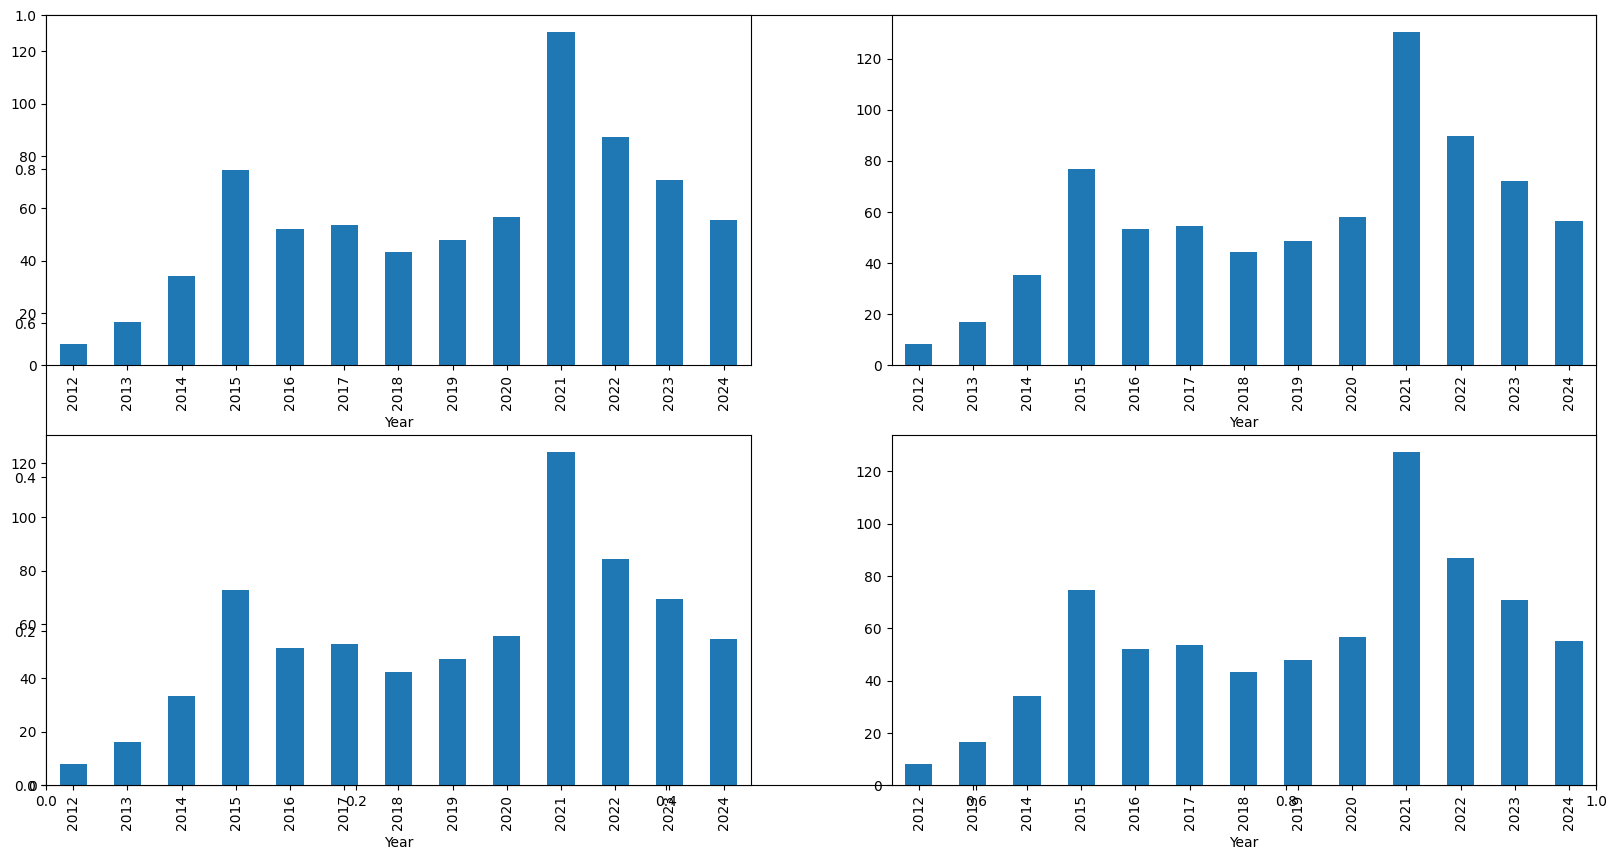

In [76]:
data_grouped = amba.filter(items=["Year", "Open", "High", "Low", "Close"]).groupby("Year").mean()

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [77]:
# If the volume of the next day (shifted by one row using shift(-1)) is greater than the current day's volume. If it is, it assigns 'Increase' to the new column; otherwise, it assigns 'Decrease'.
amba['Volume_Increase_Decrease]'] = np.where(amba['Volume'].shift(-1) > amba['Volume'], 'Increase', 'Decrease')

# If the open price of the next day (shifted by one row using shift(-1)) is greater than the current day's open price. If it is, it assigns '1' to the new column; otherwise, it assigns '0'.
# A value of 1 = Buy and a values of 0 = Sell
amba['Open_Buy_Sell'] = np.where(amba['Open'].shift(-1) > amba['Open'], 1, 0)

# If the close price of the next day (shifted by one row using shift(-1)) is greater than the current day's close price. If it is, it assigns '1' to the new column; otherwise, it assigns '0'.
# A value of 1 = Buy and a values of 0 = Sell
amba['Buy_Sell'] = np.where(amba['Close'].shift(-1) > amba['Close'], 1, 0)

# pct_change() computes the fractional change from the immediately previous row by default. 
# This is useful in comparing the fraction of change in a time series of elements.
amba['Returns'] = amba['Close'].pct_change()
amba = amba.dropna()

In [78]:
amba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end,Volume_Increase_Decrease],Open_Buy_Sell,Buy_Sell,Returns
1,2012-10-12,6.05,6.30,6.01,6.23,6.23,155200,2012,10,12,0,Increase,1,0,0.024671
2,2012-10-15,6.35,6.40,6.05,6.15,6.15,156700,2012,10,15,0,Increase,0,0,-0.012841
3,2012-10-16,6.15,6.30,5.94,6.01,6.01,173000,2012,10,16,0,Decrease,0,0,-0.022764
4,2012-10-17,6.00,6.08,5.99,6.00,6.00,113600,2012,10,17,0,Increase,1,0,-0.001664
5,2012-10-18,6.20,6.20,5.55,6.00,6.00,247300,2012,10,18,0,Decrease,0,0,0.000000


<Axes: >

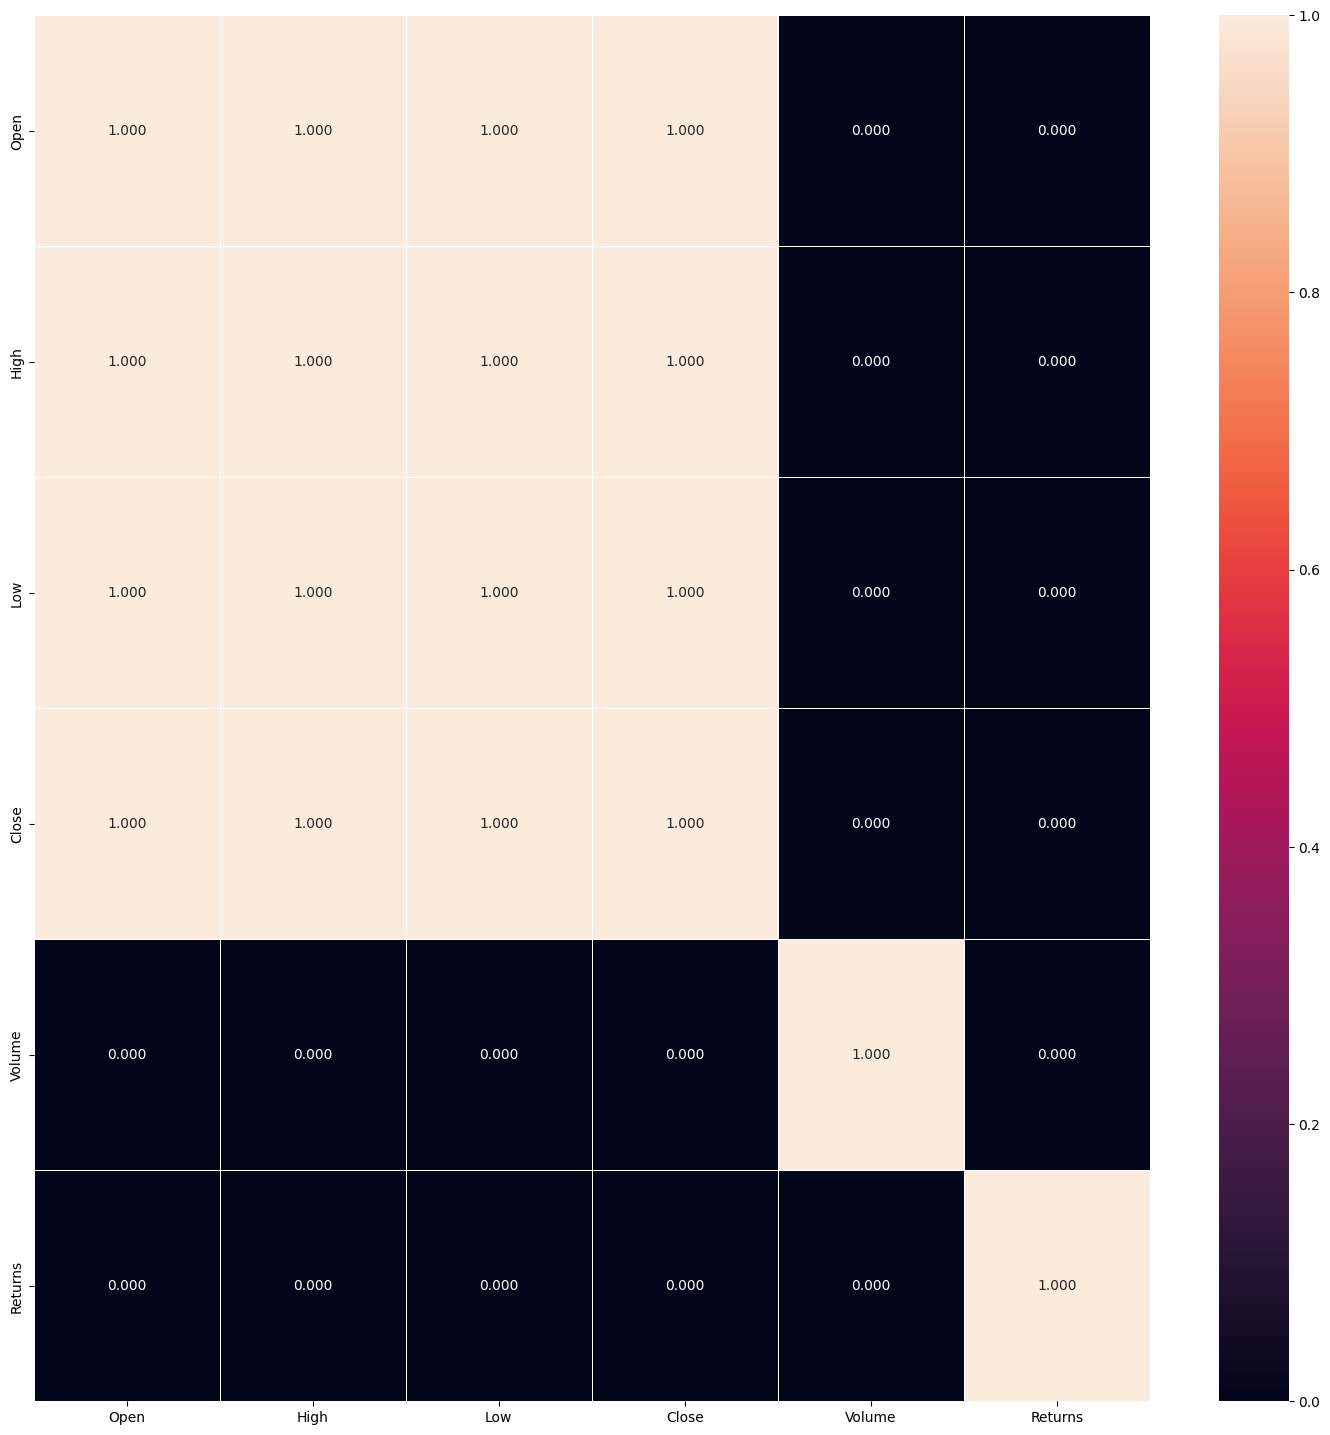

In [79]:
f,ax = plt.subplots(figsize=(18, 18))
sb.heatmap(amba[['Open', 'High', 'Low', 'Close', 'Volume', 'Returns']].corr() > 0.9, annot=True, linewidths=.5, fmt= '.3f',ax=ax)

Selecting our features and target

In [80]:
# X are the features that we use as input
X = amba[['Open', 'High', 'Low', 'Close', 'Volume']]

# y is the target that we want to output
y = amba['Buy_Sell']

Normalizing our data and splitting our data into training and testing sets

In [81]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2281, 5) (571, 5)


# Create our model

In [82]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [83]:
print(f'The mean accuracy of this test model is: {model.score(X_test, y_test)}')

The mean accuracy of this test model is: 0.5166374781085814


Calculate the RMSE (root mean square error) to measure the error of the model in predicting stock pricing

In [84]:
train_predictions = model.predict(X_train)
train_model_mse = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f'Training RMSE: {train_model_mse}')

test_predictions = model.predict(X_test)
test_model_mse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Testing RMSE: {test_model_mse}')

Training RMSE: 0.6941226299003392
Testing RMSE: 0.6952427791005229


# Making Predictions

In [85]:
y_predict = model.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

# Evaluating Model

Evaluating the accuracy of three types of models: LogisticRegression, SVC, and XGBCClassifier

In [86]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ' )
    print('Training accuracy: ', metrics.roc_auc_score(y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation accuracy: ', metrics.roc_auc_score(y_test, models[i].predict_proba(X_test)[:, 1]))
    print()

LogisticRegression() : 
Training accuracy:  0.5217057963205296
Validation accuracy:  0.5622207492512398



SVC(kernel='poly', probability=True) : 
Training accuracy:  0.47293934262181514
Validation accuracy:  0.45446064712525164

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training accuracy:  0.9748845354476176
Validation accuracy:  0.5070457111994894



Predicting whether to buy or sell based on predictions using our three models and inputing: Open, High, Low, Close, Volume of previous trading day

In [87]:
# input the latest Open, High, Low, Close, Volume
# predicts the next day price
#model.predict([[56.20, 58.29, 55.25, 57.16, 658500]])
new_data_point = [[56.20, 58.29, 55.25, 57.16, 658500]]

for model in models:
    if model.predict(new_data_point) == [1]:
        model_prediction = print('Buy')
    else:
        model_prediction = print('Sell')

    print(f'Prediction using {model}: {model.predict(new_data_point)}')

Sell
Prediction using LogisticRegression(): [0]
Buy
Prediction using SVC(kernel='poly', probability=True): [1]
Sell
Prediction using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): [0]
